In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
# Read in CSV file
df1 = pd.read_csv('toxicityClass/train.csv')

In [3]:
df2 = df1[['target', 'comment_text']]
df2.head()

,target,comment_text
0,0.000000,"This is so cool. It's like, 'would you want yo..."
1,0.000000,Thank you!! This would make my life a lot less...
2,0.000000,This is such an urgent design problem; kudos t...
3,0.000000,Is this something I'll be able to install on m...
4,0.893617,haha you guys are a bunch of losers.


In [4]:
df2 = df2.reset_index()

In [5]:
df2['comment_text'][0]

"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/John/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df2 = df2.apply(lambda x: x.astype(str).str.lower())
df2

,index,target,comment_text
0,0,0.0,"this is so cool. it's like, 'would you want yo..."
1,1,0.0,thank you!! this would make my life a lot less...
2,2,0.0,this is such an urgent design problem; kudos t...
3,3,0.0,is this something i'll be able to install on m...
4,4,0.8936170212765957,haha you guys are a bunch of losers.
5,5,0.6666666666666666,ur a sh*tty comment.
6,6,0.4576271186440678,hahahahahahahahhha suck it.
7,7,0.0,ffffuuuuuuuuuuuuuuu
8,8,0.0,the ranchers seem motivated by mostly by greed...
9,9,0.0,it was a great show. not a combo i'd of expect...


In [10]:
import re

In [17]:
df2['comment_text'] = df2['comment_text'].apply(lambda line: [word for word in re.split("( )+", line) if word not in stop])

In [18]:
# Import WordVec
from gensim.models import Word2Vec

model = Word2Vec(df2, size=100, window=5, min_count=1, workers=4)

/Users/John/anaconda3/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [19]:
model.save("word2vec.model")

In [22]:
df_new = pd.read_csv('toxicityClass/test.csv')

In [25]:
model.train(df_new['comment_text'], total_examples=4, epochs=10)

(20827984, 290703400)

In [26]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0) 

In [27]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
model1.fit(X,y)
print(model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [29]:
print('Weight coefficients: ', model1.coef_)
print('y-axis intercept: ', model1.intercept_) 

Weight coefficients:  [12.44002424]
y-axis intercept:  101.89622505659258


In [41]:
x_min = X.min()
x_max = X.max()
y_min_actual = y.min()
y_max_actual = y.max()
print(x_max, x_min)

2.240893199201458 -0.977277879876411


In [40]:
predictions = (model1.predict(X) - x_min)/ (x_max-x_min) 
predictions
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 98.01970393090812
Predicted output: 31.38136945333268
Prediction Error: -66.63833447757544


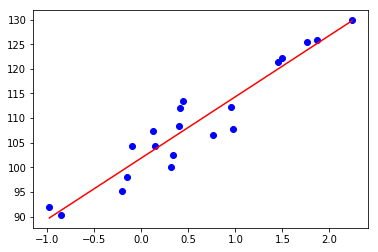

In [43]:
y_min =  101.89622505659258+ 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')